# Tarea semanal 13

## Síntesis de Funciones Transferencia Cargadas


In [1]:
from IPython.display import IFrame
IFrame("pdf/TS13_enunciado.pdf", width=1000, height=500)

In [2]:
from IPython.display import IFrame
IFrame("pdf/TS13_reso.pdf", width=800, height=500)

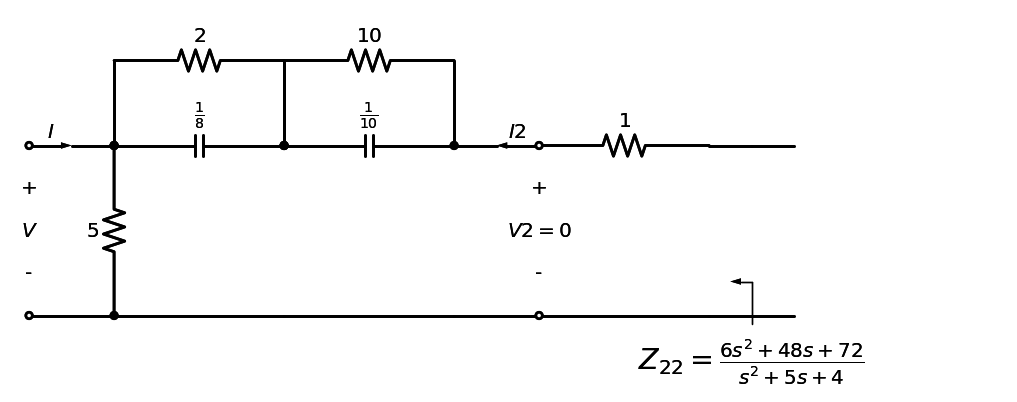

In [3]:
# Simulación simbólica 1

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Line


# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Consignas del ejercicio: resonancias de dos tanques RC
sigma1 = 1
sigma2 = 4

# Sea la siguiente función de excitación

ZZ = 6*(s**2+8*s+12)/(s**2+5*s+4)

Ra = s/s

Z2 = sp.simplify(ZZ-Ra)

Z4, Z3, R1, C1 = tc2.remover_polo_sigma(Z2, sigma1, isImpedance = True)

Z6, Z5, R2, C2 = tc2.remover_polo_sigma(Z4, sigma2, isImpedance = True)

Rc = Z6

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')


d = tc2.dibujar_elemento_derivacion(d, Resistor, Rc)

d = tc2.dibujar_tanque_RC_serie(d, R2, C2)

d = tc2.dibujar_tanque_RC_serie(d, R1, C1)    

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2 = 0$', '-'), 
                        current_lbl = '$I2$')

d = tc2.dibujar_elemento_serie(d, Resistor, Ra)

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{22}',  
                                          ZZ, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

display(d)

# Comprobación

Para comprobar el ejercicio podemos evaluar $Z_21$. En este caso, hacer la tensión $I_2$ igual a cero, la corriente de entrada sería igual a la que circuila por el resistor de $5\Omega$. Por lo tanto:

$$Z_21 = 6H = 5$$
$$\therefore H = 5/6 = 0,83333$$
$$\therefore T(0) = (5/6)(4/12) = 0,27777$$

![img](img/1_circuito.png)

Obteniendo la siguiente transferencia de corriente en frecuencia:

![img](img/1_ac.png)

Donde se puede ver que la transferencia es 0,2777 en bajas frecuencias. Coincidente con la resolución



In [4]:
from IPython.display import IFrame
IFrame("img/1_ac.png", width=1000, height=1000)

0

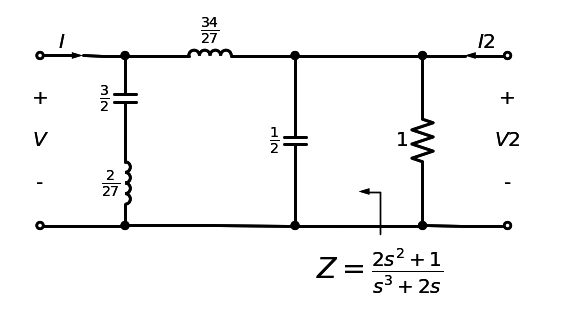

In [5]:
# Simulación simbólica 2
import sympy as sp
from sympy import oo
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor,Capacitor, Inductor

# Remueve un polo en infinito(jw) devuelve el resto y el valor del polo
def remover_polo_jw_infinito(I):
    k_inf = (I/s).limit(s, oo) 
    resto = sp.simplify(I - k_inf*s)
    return resto,k_inf

def remover_polo_parcial_jw_infinito(I, w0):
    k_inf = (I/s).subs(s**2, -w0**2)
    resto = sp.simplify(I - k_inf*s)
    return resto,k_inf

# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Consignas del ejercicio: resonancias de dos tanques RC
w1 = -3

# Sea la siguiente función de excitación

T = (s**2+9)/(s**3+2*s**2+2*s+1)

Z22 = (2*s**2 + 1)/(s**3 +2*s)

Y1 = 1/Z22

Y3, k1 = remover_polo_jw_infinito(Y1)

Z3 = 1/Y3

Z4, k3 = remover_polo_parcial_jw_infinito(Z3, w1)

Z5, k4 = remover_polo_jw_infinito(Z4)

Z6, k5 = remover_polo_jw_infinito(1/Z5)

display(Z6)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')


d = tc2.dibujar_tanque_derivacion(d, k4, k5)

d = tc2.dibujar_elemento_serie(d, Inductor, k3)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, k1)

d = tc2.dibujar_espacio_derivacion(d)

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          Z22, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Resistor, s/s)

d = tc2.dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V2$', '-'), 
                        current_lbl = '$I2$')

display(d)

# Simulación LT spice


# Circuito:

Existe una pequeña correción entre la simulación y la resolución. En la resolución puse el valor del capacitor del tanque en derivación como 18, pero me olvidé de dividir por $w^2$. Por lo que en realidad ese valor es 2.

![img](img/2_circuito.png)

En análisis de frecuencia nos devuelve el siguiente gráfico:

![img](img/2_ac_cero.png)

Podemos observar con el puntero que el cero de trasmisión está en w = 3

![img](img/2_ac_pendiente.png)

Podemos observar con los punteros que la pendiente es de 20db/decada por lo que estamos en un filtro de orden 1 como el enunciado(Luego del cero de trasmisión).
